In [1]:
from predictor import ComplexSegOnlyYOLOPredictor as YOLO
from pathbook.pathbook import *
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# Одноклассовая сегментация + классификация

In [79]:
submit = YOLO().predict(path_submit_dataset)
submit['cls conf']=submit[['klikun p','maliy p','shipun p']].max(axis=1)
submit['pred']=submit[['klikun p', 'maliy p', 'shipun p']].idxmax(axis=1).apply(lambda s: s.split(' ')[0])
answer=pd.read_csv(path_submit_annotation).drop_duplicates(subset='path')
answer['path'] = answer['path'].apply(lambda s: path_submit_dataset+'/'+s)
answer = answer.set_index('path')['class_name']
y_true = []
for idx, row in submit.iterrows():
    y_true.append(answer[row['path']])
submit['true']=y_true
agr_pred = submit.iloc[submit.groupby('path')['cls conf'].idxmax()]
accuracy_score(agr_pred.true, agr_pred.pred)


0.8974789915966387

In [29]:
val = YOLO().predict(path_val_dataset)
val['cls conf']=val[['klikun p','maliy p','shipun p']].max(axis=1)
val['pred']=val[['klikun p', 'maliy p', 'shipun p']].idxmax(axis=1).apply(lambda s: s.split(' ')[0])
val['true']=val['path'].apply(lambda s: s.split('/')[-2])
agr_pred = val.iloc[val.groupby('path')['cls conf'].idxmax()]
accuracy_score(agr_pred.true, agr_pred.pred)

0.9549483013293943

In [30]:
test = YOLO().predict(path_test_dataset)
test['cls conf']=test[['klikun p','maliy p','shipun p']].max(axis=1)
test['pred']=test[['klikun p', 'maliy p', 'shipun p']].idxmax(axis=1).apply(lambda s: s.split(' ')[0])
test['true']=test['path'].apply(lambda s: s.split('/')[-2])
agr_pred = test.iloc[test.groupby('path')['cls conf'].idxmax()]
accuracy_score(agr_pred.true, agr_pred.pred)

Loading /Users/samedi/Documents/Coding/swans/model/bin/yolov8s-segonly.onnx for ONNX Runtime inference...
0it [00:00, ?it/s]Loading /Users/samedi/Documents/Coding/swans/model/bin/yolov8m-cls.onnx for ONNX Runtime inference...
101it [00:27,  3.74it/s]
101it [00:30,  3.34it/s]
101it [00:42,  2.35it/s]


0.976897689768977

In [22]:
train = YOLO().predict(path_train_dataset)
train['cls conf']=train[['klikun p','maliy p','shipun p']].max(axis=1)
train['pred']=train[['klikun p', 'maliy p', 'shipun p']].idxmax(axis=1).apply(lambda s: s.split(' ')[0])
train['true']=train['path'].apply(lambda s: s.split('/')[-2])
agr_pred = train.iloc[train.groupby('path')['cls conf'].idxmax()]
accuracy_score(agr_pred.true, agr_pred.pred)

0.9827773257390833

array([[<AxesSubplot:title={'center':'seg conf'}>]], dtype=object)

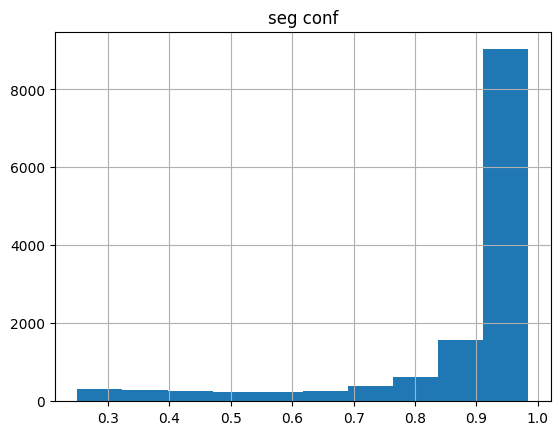

In [12]:
results.hist(bins=10,column='seg conf')

array([[<AxesSubplot:title={'center':'cls conf'}>]], dtype=object)

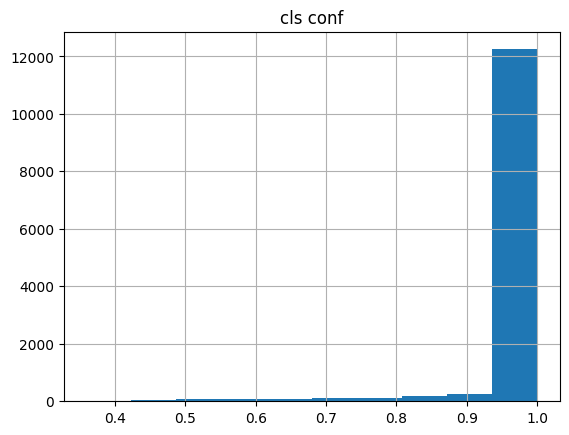

In [13]:
results['cls conf'] = results[['klikun p','maliy p','shipun p']].max(axis=1)
results.hist(bins=10,column='cls conf')

array([[<AxesSubplot:title={'center':'mul conf'}>]], dtype=object)

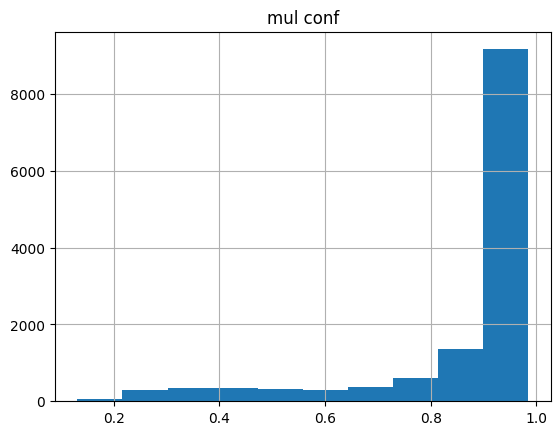

In [14]:
results['mul conf']=results['cls conf']*results['seg conf']
results.hist(bins=10,column='mul conf')

<AxesSubplot:>

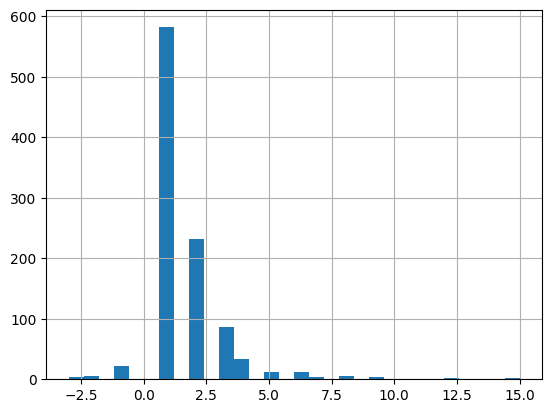

In [15]:
answers = pd.read_csv(path_train_annotation)
answers['path'] = answers['path'].apply(lambda s: path_train_dataset+'/'+s)
overcount = (results.groupby('path').count().iloc[...,0]-answers.groupby('path').count().iloc[...,0])
overcount[overcount!=0].hist(bins=30)

In [21]:
# train
for label in ['klikun','shipun','maliy']:
    slice = agr_pred[agr_pred.true==label]
    print(label+':', accuracy_score(slice.true, slice.pred))

klikun: 0.9789046653144016
shipun: 0.9764227642276423
maliy: 0.9930583911800736


In [81]:
# sumbit
for label in ['klikun','shipun','maliy']:
    slice = agr_pred[agr_pred.true==label]
    print(label+':', accuracy_score(slice.true, slice.pred))

klikun: 0.8377192982456141
shipun: 0.9242424242424242
maliy: 0.9467455621301775


In [89]:
train.drop(columns=['mul conf']).to_csv('train.csv',index=False)
val.to_csv('val.csv',index=False)
test.to_csv('test.csv',index=False)
submit.to_csv('submit.csv',index=False)